In [23]:
import os
import pickle
import numpy as np
import pandas as pd

In [27]:
import matplotlib.pyplot as plt

In [30]:
from PIL import Image

In [6]:
root_path = '/data/zak/robot/'
os.listdir(root_path)

['labels', '.ipynb_checkpoints', 'rosbag', 'extracted']

In [5]:
labels_path = os.path.join(root_path, 'labels')
os.listdir(labels_path)

['uc', '.ipynb_checkpoints', 'erb', 'nh', 'heracleia', 'mocap']

In [7]:
dataset_labels = os.path.join(labels_path, 'heracleia')
os.listdir(dataset_labels)

['info.csv',
 'labels_balanced.csv',
 'labels_christos.csv',
 '.ipynb_checkpoints',
 'labels.csv',
 'labels_old.csv']

In [10]:
dataset_info_path = os.path.join(dataset_labels, 'info.csv')
df = pd.read_csv(dataset_info_path)
df.head()

,Unnamed: 0,dataset,date,jointLabeled,img,joints,front_laser,label
0,0,heracleia,8_12_un,False,/data/zak/robot/extracted/heracleia/8_12_un/im...,/data/zak/robot/extracted/heracleia/8_12_un/jo...,/data/zak/robot/extracted/heracleia/8_12_un/fr...,NaN
1,1,heracleia,8_12_un,False,/data/zak/robot/extracted/heracleia/8_12_un/im...,/data/zak/robot/extracted/heracleia/8_12_un/jo...,/data/zak/robot/extracted/heracleia/8_12_un/fr...,NaN
2,2,heracleia,8_12_un,False,/data/zak/robot/extracted/heracleia/8_12_un/im...,/data/zak/robot/extracted/heracleia/8_12_un/jo...,/data/zak/robot/extracted/heracleia/8_12_un/fr...,NaN
3,3,heracleia,8_12_un,False,/data/zak/robot/extracted/heracleia/8_12_un/im...,/data/zak/robot/extracted/heracleia/8_12_un/jo...,/data/zak/robot/extracted/heracleia/8_12_un/fr...,NaN
4,4,heracleia,8_12_un,False,/data/zak/robot/extracted/heracleia/8_12_un/im...,/data/zak/robot/extracted/heracleia/8_12_un/jo...,/data/zak/robot/extracted/heracleia/8_12_un/fr...,NaN


In [12]:
df['date'].value_counts()

8_26       8850
8_12_un    6252
9_9_un     2193
Name: date, dtype: int64

In [15]:
labeled = df.loc[df['jointLabeled'] == True]
labeled.head()

,Unnamed: 0,dataset,date,jointLabeled,img,joints,front_laser,label
6252,6252,heracleia,8_26,True,/data/zak/robot/extracted/heracleia/8_26/img/1...,/data/zak/robot/extracted/heracleia/8_26/joint...,/data/zak/robot/extracted/heracleia/8_26/front...,NaN
6253,6253,heracleia,8_26,True,/data/zak/robot/extracted/heracleia/8_26/img/1...,/data/zak/robot/extracted/heracleia/8_26/joint...,/data/zak/robot/extracted/heracleia/8_26/front...,NaN
6254,6254,heracleia,8_26,True,/data/zak/robot/extracted/heracleia/8_26/img/1...,/data/zak/robot/extracted/heracleia/8_26/joint...,/data/zak/robot/extracted/heracleia/8_26/front...,NaN
6255,6255,heracleia,8_26,True,/data/zak/robot/extracted/heracleia/8_26/img/1...,/data/zak/robot/extracted/heracleia/8_26/joint...,/data/zak/robot/extracted/heracleia/8_26/front...,NaN
6256,6256,heracleia,8_26,True,/data/zak/robot/extracted/heracleia/8_26/img/1...,/data/zak/robot/extracted/heracleia/8_26/joint...,/data/zak/robot/extracted/heracleia/8_26/front...,NaN


In [100]:
def plot_img_laser(img_paths, laser_paths, joint_paths, sample_size):
    fig, axs = plt.subplots(sample_size,3, figsize=(20, 20))
    for i, img_path in enumerate(img_paths):
        laser_path, joint_path = laser_paths[i], joint_paths[i]
        with open(laser_path, 'rb') as f:
            laser = pickle.load(f)
        with open(joint_path, 'rb') as f:
            joints = pickle.load(f)
        img = Image.open(img_path)
        axs[i, 0].imshow(img)
        axs[i, 0].set_title('Image')
        axs[i, 1].plot(laser['ranges'])
        axs[i, 1].set_title('Laser')
        axs[i, 1].set_ylim([0, 5])
        axs[i, 2].plot(joints['velocity'])
        axs[i, 2].set_title('Velocities (BL, BR, FL, FR)')
#         axs[i, 2].set_ylim([-2, 5])

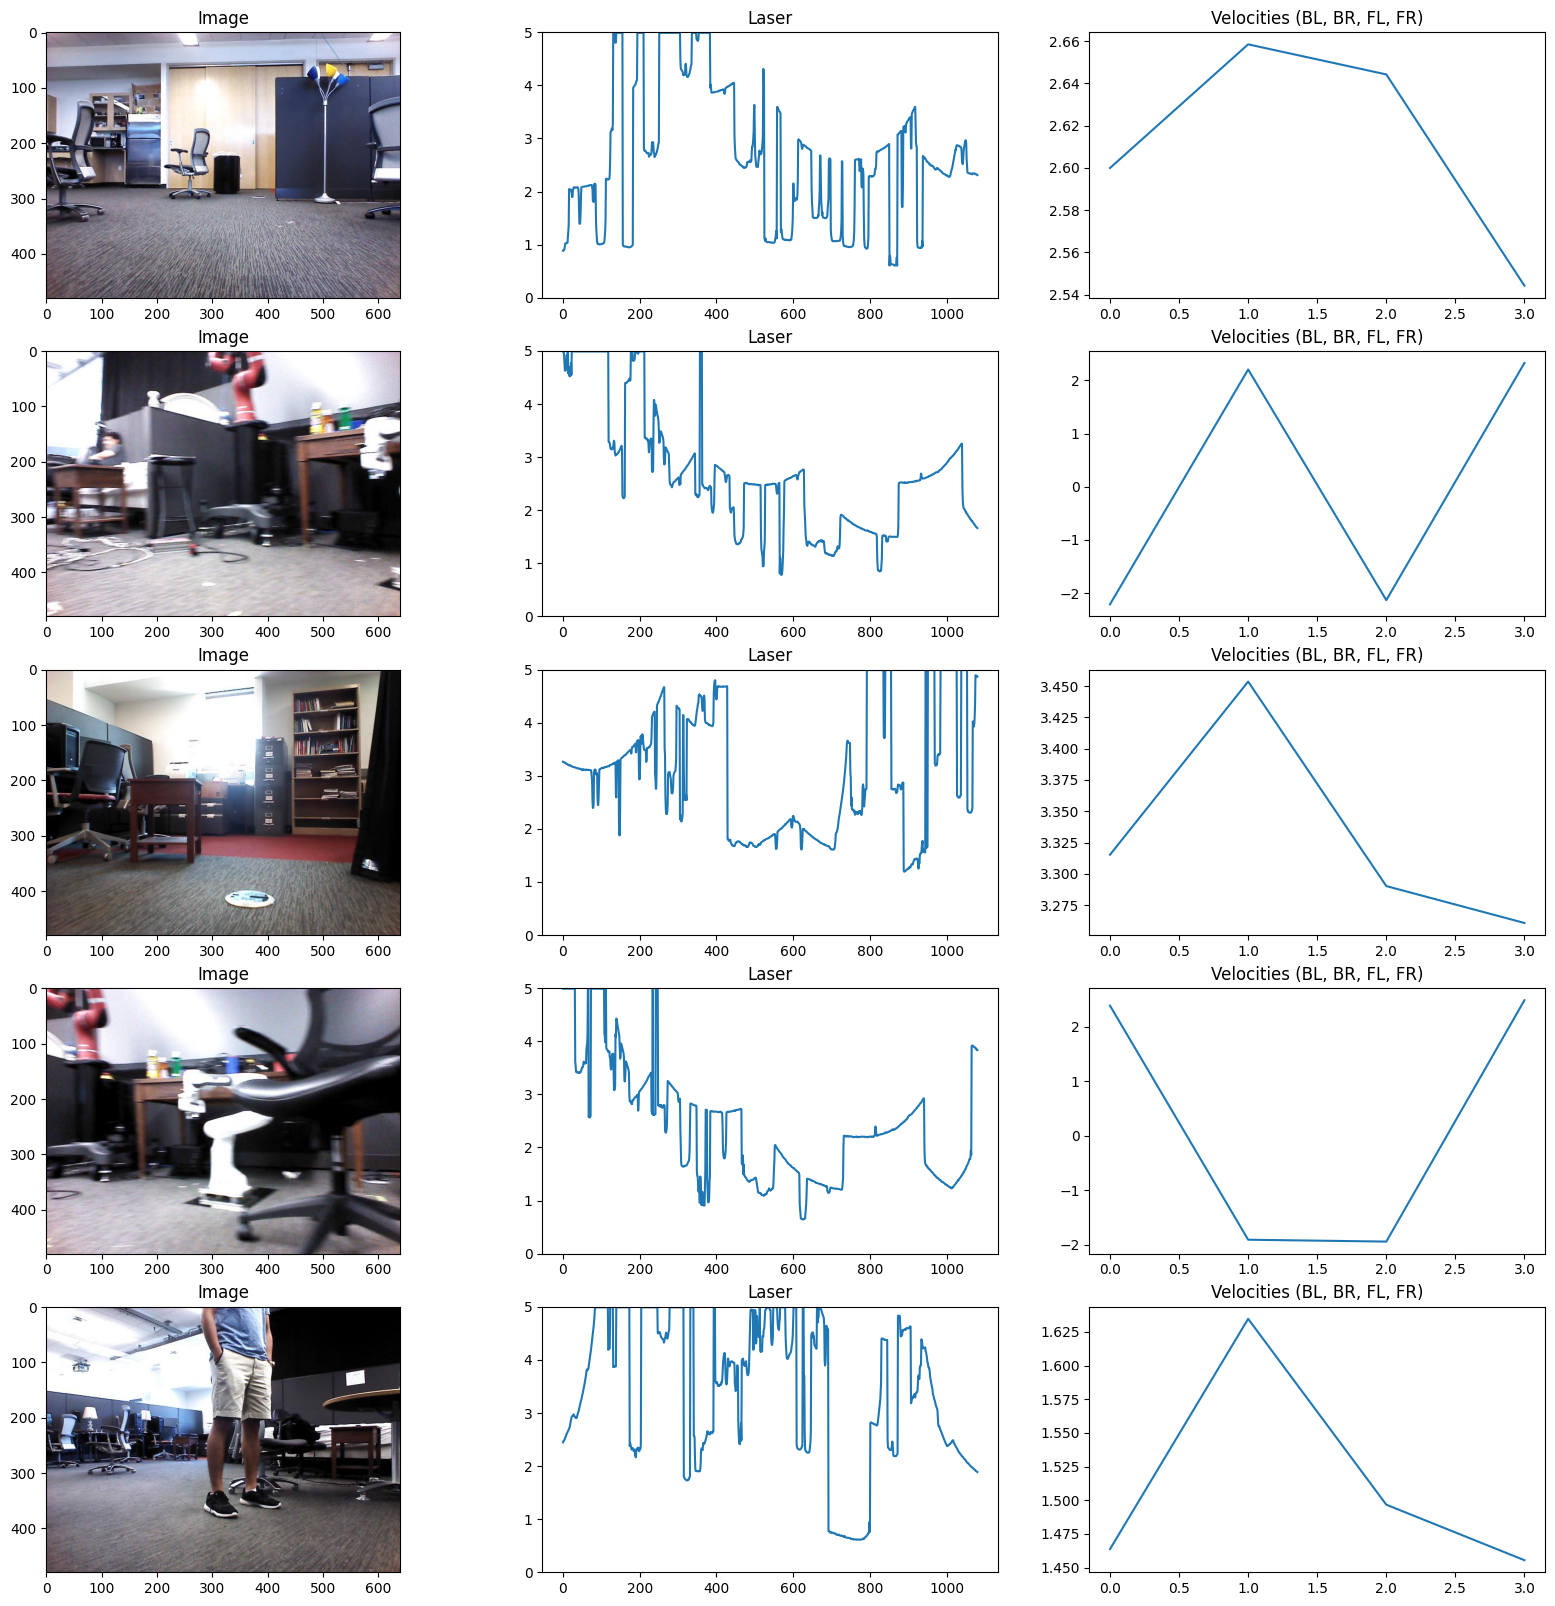

In [101]:
sample_size = 5
sample_rows = labeled.sample(sample_size)
front_laser_paths = sample_rows['front_laser'].tolist()
img_paths = sample_rows['img'].tolist()
joint_paths = sample_rows['joints'].tolist()
plot_img_laser(img_paths, front_laser_paths, joint_paths, sample_size)

In [26]:
with open(laser_path, 'rb') as f:
    laser = pickle.load(f)
    
laser

{'angle_min': -2.356194496154785,
 'angle_max': 2.356194496154785,
 'angle_increment': 0.004363323096185923,
 'time_increment': 1.736111516947858e-05,
 'scan_time': 0.02500000037252903,
 'range_min': 0.019999999552965164,
 'range_max': 60.0,
 'ranges': (4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.938000202178955,
  4.705999851226807,
  4.5970001220703125,
  4.552999973297119,
  4.552999973297119,
  4.617000102996826,
  4.711999893188477,
  4.821000099182129,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.989999771118164,
  4.98999977

In [84]:
joint_path = labeled.sample(1)['joints'].item()
with open(joint_path, 'rb') as f:
    joints = pickle.load(f)
    
joints

{'name': ['robot_back_left_wheel_joint',
  'robot_back_right_wheel_joint',
  'robot_front_left_wheel_joint',
  'robot_front_right_wheel_joint'],
 'position': (0.0, -0.0, 0.0, -0.0),
 'velocity': (2.4639364754333926,
  2.5292229195502527,
  2.488030282190805,
  2.6279047336992396),
 'effort': (1.482421875, 1.4453125, 0.7998046875, 0.4970703125)}

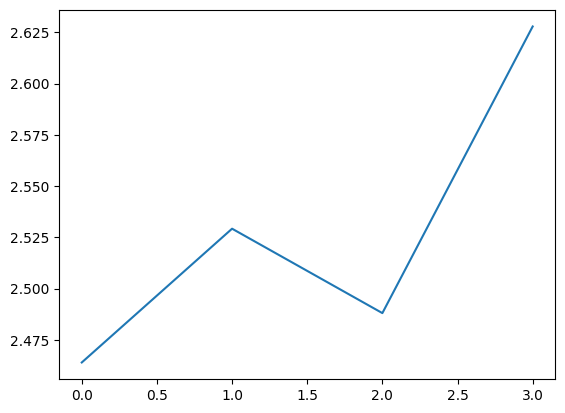

In [85]:
plt.plot(joints['velocity'])

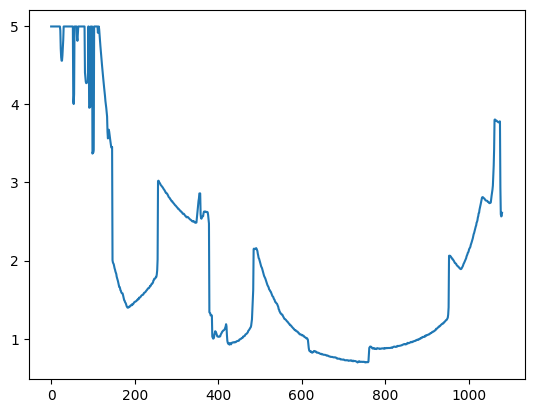

In [28]:
plt.plot(laser['ranges'])